[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lisphilar/covid19-sir/HEAD?labpath=example%2F06_prediction.ipynb)

# ODE parameter prediction
We will perform ODE parameter prediction for forecasting of the number of cases. We have two ways for prediction.

1. Time-series prediction withOUT indicators
2. Time-series prediction with indicators

The second one uses indicators, including OxCGRT indicators, the number of vaccinations.

Note:  
The target (Y) of prediction is ODE parameter values, not the number of cases. ODE parameter values are more useful because ODE parameter values have physical meanings, including (non-dimensional) effective contact rate, and they are always in the range of (0, 1). 

In [1]:
from datetime import timedelta
import covsirphy as cs
from matplotlib import pyplot as plt
import numpy as np
cs.__version__

'3.0.0'

The target of prediction is estimated ODE parameter values. At we will prepare them as explained with tutorials. For example, we can use class method `ODEScenario.auto_build()`, specifying location name. "Baseline" scenario will be created automatically with downloaded datasets.

In [2]:
snr = cs.ODEScenario.auto_build(geo="Japan", model=cs.SIRFModel)
# Show summary
snr.summary()

2023-07-13 at 17:18:40 | INFO | Retrieving COVID-19 dataset from https://github.com/lisphilar/covid19-sir/data/
2023-07-13 at 17:18:40 | INFO | Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
2023-07-13 at 17:19:14 | INFO | 
<SIR-F Model: parameter estimation>
2023-07-13 at 17:19:14 | INFO | Running optimization with 8 CPUs...


  0%|          | 0/68 [00:00<?, ?it/s]

2023-07-13 at 17:20:37 | INFO | Completed optimization. Total: 1 min 22 sec



Start        End    Rt     theta     kappa       rho  \
Scenario Phase                                                             
Baseline 0th   2020-02-23 2020-08-10   1.3  0.041519  0.000027  0.002207   
         1st   2020-08-11 2020-11-16  0.85  0.004985  0.000006  0.001035   
         2nd   2020-11-17 2020-12-24  1.65  0.003287  0.000009  0.001212   
         3rd   2020-12-25 2021-01-16  1.63  0.000472  0.000013  0.001182   
         4th   2021-01-17 2021-02-10  0.75  0.000281  0.000016   0.00083   
...                   ...        ...   ...       ...       ...       ...   
         63rd  2023-03-12 2023-03-27  1.71  0.001021  0.000003  0.000931   
         64th  2023-03-28 2023-04-07  0.79  0.000193  0.000005  0.001625   
         65th  2023-04-08 2023-04-18  1.44  0.001938  0.000002   0.00168   
         66th  2023-04-19 2023-04-27  1.67    0.0062  0.000001  0.001883   
         67th  2023-04-28 2023-05-08  1.58  0.000089  0.000002  0.001311   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.001598       0.042             617             8   
         1st    0.001203       0.005            2792            16   
         2nd    0.000724       0.003            1840            14   
         3rd     0.00071         0.0            1311            14   
         4th    0.001093         0.0            1041            20   
...                  ...         ...             ...           ...   
         63rd   0.000539       0.001            4919            18   
         64th    0.00204         0.0            3386            10   
         65th   0.001163       0.002            7587            10   
         66th   0.001117       0.006           12557             9   
         67th   0.000826         0.0            6777            13   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th               10  SIR-F Model   24  
         1st               14  SIR-F Model   24  
         2nd               23  SIR-F Model   24  
         3rd               23  SIR-F Model   24  
         4th               15  SIR-F Model   24  
...                       ...          ...  ...  
         63rd              31  SIR-F Model   24  
         64th               8  SIR-F Model   24  
         65th              14  SIR-F Model   24  
         66th              15  SIR-F Model   24  
         67th              20  SIR-F Model   24  

[68 rows x 13 columns]

For demonstration, we will get the start date of future phases.

In [3]:
future_start_date = snr.simulate(display=False).index.max() + timedelta(days=1)
future_start_date

Timestamp('2023-05-09 00:00:00')

## 1. Time-series prediction withOUT indicators
This scenario "Predicted" does not use indicators, using [AutoTS package: a time series package for Python designed for rapidly deploying high-accuracy forecasts at scale](https://github.com/winedarksea/AutoTS).

At first, create "Predicted" scenario, copying estimated ODE parameter values of "Baseline" scenario.

In [4]:
snr.build_with_template(name="Predicted", template="Baseline");

Then, run `ODEScenario().predict(days, name, **kwargs)`. We can apply keyword arguments of `autots.AutoTS()` except for `forecast_length` (always the same as `days`).

In [5]:
snr.predict(days=30, name="Predicted");

Using 6 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 15 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}, "2": {"decimals": 0, "on_transform": false, "on_inverse": true}}}
Model Number: 16 with model ConstantNaive in generation 0 of 1 with params {"constant": 1} and transformations {"fillna": "nearest", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "AlignLastValue"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": null}, "2": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only": false}}}
Model Number: 17 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill_mean_biased", 

Check the predicted ODE parameter values.

In [6]:
df = snr.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-07-13 at 17:20:58 | ERROR | validation of end failed
2023-07-13 at 17:20:58 | ERROR | validation of end failed


,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,68th,2023-05-09,2023-06-07,1.23,0.000823,0.000002,0.001311,0.001062,0.001,6777,13,16,SIR-F Model,24


Check the dynamics.

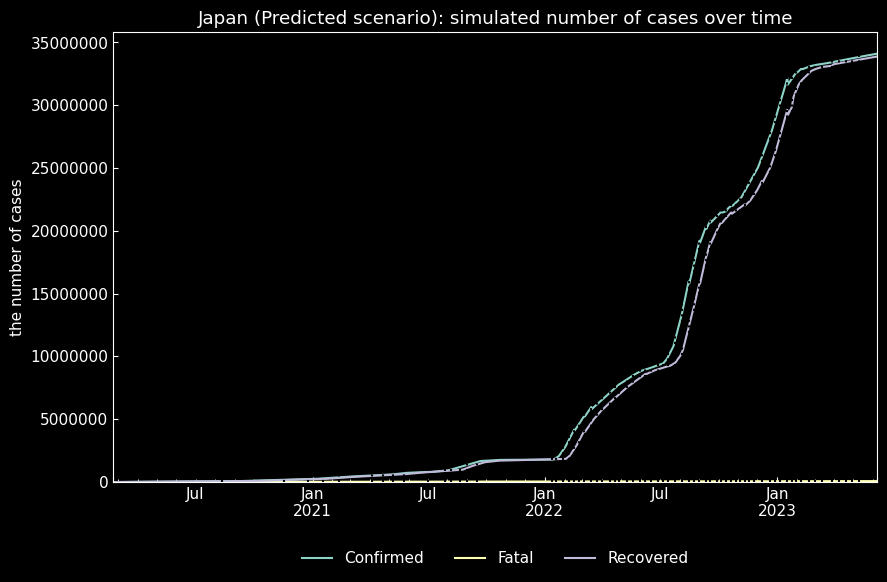

In [7]:
snr.simulate(name="Predicted");

## 2. Time-series prediction with indicators
using [`future_regressor` functionality of AutoTS](https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html#adding-regressors-and-other-information), we will predict ODE parameter values with indicators. We can download/create time-series data of indicators using `DataEngineer` class as explained in [Tutorial: Data preparation](https://lisphilar.github.io/covid19-sir/01_data_preparation.html) and [Tutorial: Data engineering](https://lisphilar.github.io/covid19-sir/02_data_engineering.html).

In [8]:
data_eng = cs.DataEngineer()
data_eng.download(databases=["japan", "covid19dh", "owid"]).clean().transform()
subset_df, *_ = data_eng.subset(geo="Japan")
indicator_df = subset_df.drop(["Population", "Susceptible", "Confirmed", "Infected", "Fatal", "Recovered"], axis=1)
indicator_df

2023-07-13 at 17:21:04 | INFO | Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
2023-07-13 at 17:21:06 | INFO | Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
2023-07-13 at 17:21:06 | INFO | Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/


,Cancel_events,Contact_tracing,Gatherings_restrictions,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,School_closing,Stay_home_restrictions,Stringency_index,Testing_policy,...,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing,Country_0,Country_Japan,Product_0,"Product_Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech"
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2020-02-06,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,19.44,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2020-02-07,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,19.44,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2020-02-08,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,19.44,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2020-02-09,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,19.44,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.33,1.0,...,0.0,63889986991.0,67171434888.0,181897083005.0,50835661126.0,1.0,0,1,0,1
2023-05-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.33,1.0,...,0.0,63993367323.0,67276140121.0,182280782416.0,51011274972.0,1.0,0,1,0,1
2023-05-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.33,1.0,...,0.0,64096748099.0,67380845596.0,182664482513.0,51186888818.0,1.0,0,1,0,1


### 2.1 Principal Component Analysis
To remove multicollinearity of indicators, we use [pca package: a python package to perform Principal Component Analysis and to create insightful plots](https://github.com/erdogant/pca) via our `MLEngineer(seed=0).pca(X, n_components)`.  Standardization (Z-score normalization) and Principal Component Analysis (PCA) will be performed.

In [9]:
ml = cs.MLEngineer()
pca_dict = ml.pca(X=indicator_df, n_components=0.95)
pca_df = pca_dict["PC"].copy()
pca_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
2023-05-04,5.673492,2.243826,-0.555292,-0.134307,0.888876,-0.020971,0.364962,0.630145,0.039768,-0.324168
2023-05-05,5.683267,2.247735,-0.557146,-0.134422,0.891652,-0.019268,0.363681,0.632074,0.041499,-0.325286
2023-05-06,5.693041,2.251644,-0.558999,-0.134538,0.894427,-0.017564,0.362401,0.634004,0.043231,-0.326404
2023-05-07,5.702815,2.255553,-0.560853,-0.134654,0.897203,-0.015860,0.361120,0.635933,0.044962,-0.327522
2023-05-08,5.712591,2.259462,-0.562707,-0.134770,0.899979,-0.014157,0.359839,0.637862,0.046694,-0.328641


The output of `MLEngineer().pca()` is the model of [pca package](https://github.com/erdogant/pca), we can show some figures easily as follows.

Explained variance:

In [10]:
pca_dict["model"].plot()
plt.close()

Top features:

In [11]:
df = pca_dict["topfeat"].copy()
df["PC"] = df["PC"].str.extract(r"(\d+)").astype(np.int64)
df = df.sort_values(["PC", "type"]).reset_index(drop=True)

def highlight(d):
    styles = d.copy()
    styles.loc[:, :] = ""
    styles.loc[d["type"] == "best", :] = "background-color: yellow"
    return styles

df.style.apply(highlight, axis=None)

,PC,feature,loading,type
0,1,Vaccinated_once,0.347669,best
1,1,Contact_tracing,-0.294071,weak
2,1,Information_campaigns,-0.281398,weak
3,1,Vaccinated_full,0.346382,weak
4,1,Vaccinations,0.343559,weak
5,1,Vaccinations_boosters,0.308128,weak
6,2,Stringency_index,-0.438532,best
7,2,International_movement_restrictions,-0.313789,weak
8,2,Product_0,0.318462,weak
9,2,"Product_Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech",-0.318462,weak


### 2-2. Future values of indicators
Before prediction of ODE parameter values, we need to prepare future values of (PCA-performed) indicators. We can add future values to the `pandas.DataFrame` manually or forecast them with `MLEngineer(seed=0).predict(Y, days=<int>, X=None)` as follows.

In [12]:
future_df = ml.forecast(Y=pca_df, days=30, X=None)
future_df.tail()

Using 6 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Date,,,,,,,,,,
2023-06-03,5.966747,2.361111,0.0,0.0,0.972152,0.0,0.326543,0.688027,0.091715,0.0
2023-06-04,5.976522,2.365021,0.0,0.0,0.974928,0.0,0.325262,0.689956,0.093447,0.0
2023-06-05,5.986297,2.368930,0.0,0.0,0.977704,0.0,0.323982,0.691886,0.095179,0.0
2023-06-06,5.996072,2.372840,0.0,0.0,0.980480,0.0,0.322701,0.693815,0.096910,0.0
2023-06-07,6.005848,2.376750,0.0,0.0,0.983256,0.0,0.321420,0.695745,0.098642,0.0


### 2-3. Prediction of ODE parameter values
Now we have Y (estimated ODE parameter values) and X (estimated/forecasted indicator values without multicollinearity), we can predict ODE parameter values of future phases using `ODEScenario().predict(days=<int>, name=<str>, seed=0, X=<pandas.DataFrame>)`. The new scenario is named "Predicted_with_X" here.

In [13]:
snr.build_with_template(name="Predicted_with_X", template="Baseline")
snr.predict(days=30, name="Predicted_with_X", seed=0, X=future_df);

Using 6 cpus for n_jobs.
Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"mode

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 15 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}, "2": {"decimals": 0, "on_transform": false, "on_inverse": true}}}
Model Number: 16 with model ConstantNaive in generation 0 of 1 with params {"constant": 1} and transformations {"fillna": "nearest", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "AlignLastValue"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": null}, "2": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only": false}}}
Model Number: 17 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill_mean_biased", 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.11302e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 74 with model AverageValueNaive in generation 1 of 1 with params {"method": "Midhinge", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "DifferencedTransformer", "1": "RegressionFilter"}, "transformation_params": {"0": {}, "1": {"sigma": 2, "rolling_window": 90, "run_order": "season_first", "regression_params": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": "expanded", "polynomial_degree": null, "transform_dict": null, "holiday_countries_used": false}, "holiday_params": {"threshold": 1.0, "splash_threshold": null, "use_dayofmonth_holidays": true, "use_wkdom_holidays": true, "use_wkdeom_holidays": false, "use_lunar_holidays": false, "use_lunar_weekday": false, "use_islamic_holidays": false, "use_hebrew_holidays": false, "anomaly_detector_params": {"method": "zscore", "method_params": {"distribution": "chi2", "alpha": 0.05}, "fillna": "ffill", "transform_dict": {"fillna": "ffill", "transformations": {"0"

## 3. Compare scenarios
As explained with [Tutorial: Scenario analysis](https://lisphilar.github.io/covid19-sir/05_scenario_analysis.html), we can compare scenarios.

In [14]:
# Adjust the last date, appending a phase
snr.append();

2023-07-13 at 17:22:03 | ERROR | validation of end failed
2023-07-13 at 17:22:03 | ERROR | validation of end failed
2023-07-13 at 17:22:03 | ERROR | validation of end failed


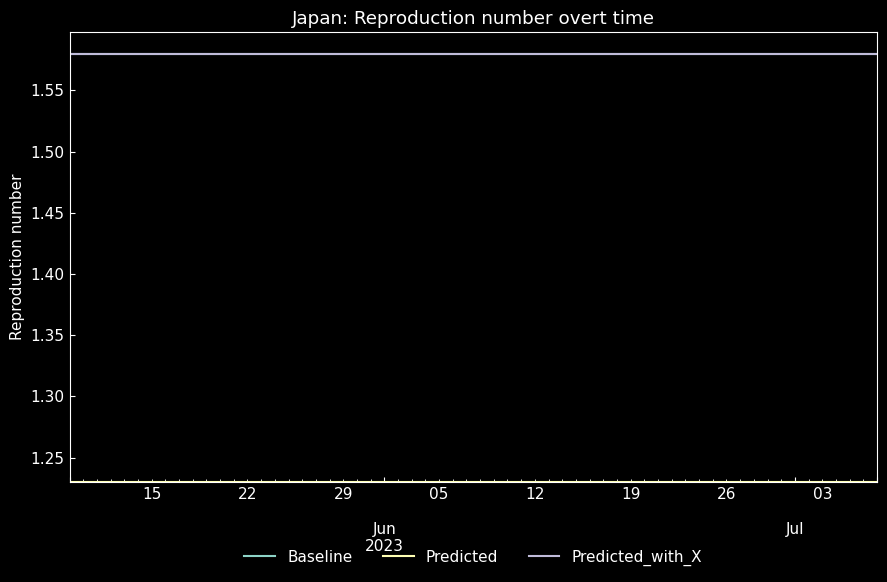

In [15]:
# Compare reproduction number
ymin = snr.compare_param("Rt", date_range=(future_start_date, None), display=False).min().min()
snr.compare_param("Rt", date_range=(future_start_date, None), ylim=(ymin, None));

Note that minimum value of y in the figure was changed to focus on the differences of the scenarios.

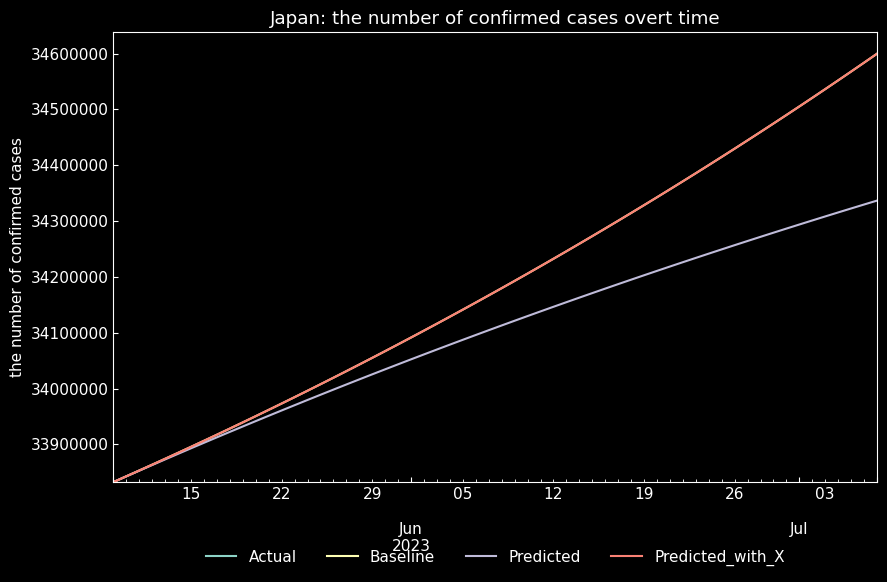

In [16]:
ymin_value = snr.compare_cases("Confirmed", date_range=(future_start_date, None), display=False).Predicted.min()
snr.compare_cases("Confirmed", date_range=(future_start_date, None), ylim=(ymin_value, None));

In [17]:
# Show representative values
snr.describe()

,max(Infected),argmax(Infected),Confirmed on 07Jul2023,Infected on 07Jul2023,Fatal on 07Jul2023
Baseline,3675951.0,2022-08-15,34599706,281425.0,76836.0
Predicted,3675951.0,2022-08-15,34336654,122010.0,76504.0
Predicted_with_X,3675951.0,2022-08-15,34599706,281425.0,76836.0


Thank you!